<a href="https://colab.research.google.com/github/IMakeTheSites/transferLearning_tensorFlow/blob/main/Review_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [5]:
import tensorflow_hub as hub
print ("Hub version: ", hub.__version__)

Hub version:  0.16.1


In [9]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Split the training set into 60% for training and 40% for validation
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True
)

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [11]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(5)))
train_examples_batch

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [12]:
train_labels_batch

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 1, 1])>

In [13]:
# Embedding layer with TensorFlow Hub pretrained model
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:5])

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[ 1.7657859 , -3.882232  ,  3.913424  , -1.5557289 , -3.3362343 ,
        -1.7357956 , -1.9954445 ,  1.298955  ,  5.081597  , -1.1041285 ,
        -2.0503852 , -0.7267516 , -0.6567596 ,  0.24436145, -3.7208388 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489715 , -1.1315986 ],
       [ 1.8804485 , -2.5852385 ,  3.4066994 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.7855542 ,  1.3874227 ,  3.8476458 , -0.9256539 ,
        -1.896706  ,  1.2113281 ,  0.11474716,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015903 , -1.6390051 ],
       [ 0.71152216, -0.63532174,  1.7385626 , -1.1168287 , -0.54515934,
        -1.1808155 ,  0.09504453,  1.4653089 ,  0.66059506,  0.79308075,
        -2.2268343 ,  0.07446616, -1.4075902 , -0.706454  , -1.907037  ,
         1.4419788 ,  1.9551864 , -0.42660046, -2.8022065 ,  0.43727067],
       [ 1.5164999 , -0.7103405 ,  1.8556769 , -1.2033532 , -1.3105817 ,

In [14]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
NUM_EPOCHS = 20

In [17]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=NUM_EPOCHS,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 11s 254ms/step - loss: 0.6633 - accuracy: 0.6029 - val_loss: 0.6289 - val_accuracy: 0.6463
Epoch 2/20
30/30 [==============================] - 7s 226ms/step - loss: 0.6019 - accuracy: 0.6570 - val_loss: 0.5842 - val_accuracy: 0.6689
Epoch 3/20
30/30 [==============================] - 5s 172ms/step - loss: 0.5608 - accuracy: 0.6901 - val_loss: 0.5497 - val_accuracy: 0.6963
Epoch 4/20
30/30 [==============================] - 7s 221ms/step - loss: 0.5245 - accuracy: 0.7223 - val_loss: 0.5190 - val_accuracy: 0.7286
Epoch 5/20
30/30 [==============================] - 5s 175ms/step - loss: 0.4887 - accuracy: 0.7525 - val_loss: 0.4892 - val_accuracy: 0.7504
Epoch 6/20
30/30 [==============================] - 6s 186ms/step - loss: 0.4526 - accuracy: 0.7801 - val_loss: 0.4605 - val_accuracy: 0.7656
Epoch 7/20
30/30 [==============================] - 7s 238ms/step - loss: 0.4178 - accuracy: 0.8017 - val_loss: 0.4321 - val_accuracy: 0.7841
Epoch

In [18]:
# Training curves
def display_training_curves(history, title):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(NUM_EPOCHS)

  plt.plot(epochs_range, acc, label='Train accuracy')
  plt.plot(epochs_range, val_acc, label='Val accuracy')
  plt.title(title)
  plt.legend(loc='upper left')
  plt.figure()

  plt.show()

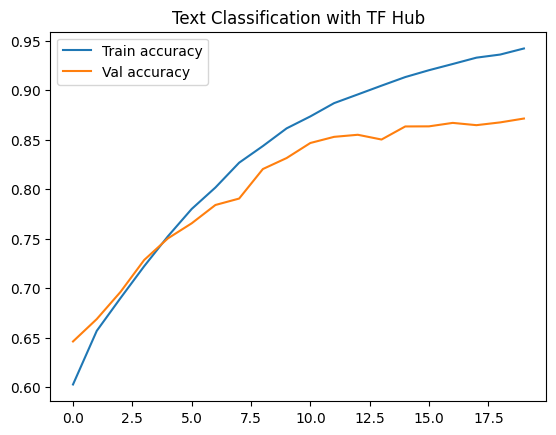

<Figure size 640x480 with 0 Axes>

In [19]:
# Display training curves
display_training_curves(history, "Text Classification with TF Hub")

In [20]:
# Evaluate the model
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 3s - loss: 0.3172 - accuracy: 0.8619 - 3s/epoch - 59ms/step
loss: 0.317
accuracy: 0.862
